# Tikz learning note

By LongGang Pang, lgpang@qq.com

In [1]:
%load_ext tikzmagic

This note records how to learn tikz in jupyter-notebook, with tikz for jupyter-notebook extension installed. If you do not know what is tikz, here is the official introduction from [tikz manual](https://www.texample.net/media/pgf/builds/pgfmanualCVS2012-11-04.pdf). Notice that tikz is a user friendly frontend of pgf package,

    "The pgf package, where “pgf” is supposed to mean “portable graphics format” (or “pretty, good, functional”
    if you prefer. . . ), is a package for creating graphics in an “inline” manner. It defines a number of TEX
    commands that draw graphics. For example, ... and the code \tikz \fill[orange] (1ex,1ex) circle (1ex); yields 
<img src="circle.png" alt="circle" width="20"/>

    In a sense, when you use pgf you “program” your graphics, just as you “program” your document when
    you use TEX. You get all the advantages of the “TEX-approach to typesetting” for your graphics: quick
    creation of simple graphics, precise positioning, the use of macros, often superior typography. You also
    inherit all the disadvantages: steep learning curve, no wysiwyg, small changes require a long recompilation
    time, and the code does not really “show” how things will look like."

The jupyter-notebook extension is installed using: 
```bash
pip install git+git://github.com/mkrphys/ipython-tikzmagic.git
```

The document for the tikz extersion can be found here, [tikzmagic](https://github.com/lgpang/ipython-tikzmagic).
Some useful options:

    -sc or --scale: scaling factor of plots, default=1
    -s or --size: pixel size of plots, e.g., -s width,height, default=400,240
    -f or --format: plot format (png, svg or jpg), default=png
    -e or --encoding: text encoding, default=utf-8
    -x or --preamble: LaTeX preamble to insert before tikz figure, default=None
    -p or --package: LaTeX packages to load, separated by comma, e.g., -p pgfplots,textcomp, default=None
    -l or --library: TikZ libraries to load, separated by comma, e.g., -l matrix,arrows, default=None
    -S or --save: save a copy to file, e.g., -S filename, default=None

## Simple examples from the tikz manual

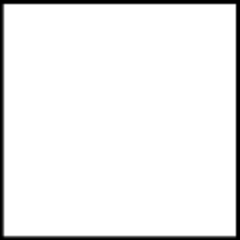

In [2]:
%tikz \draw (0,0) rectangle (1,1);

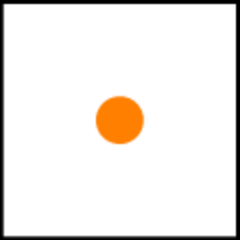

In [3]:
%%tikz
\draw (0,0) rectangle (1,1);
\fill[orange] (0.5,0.5) circle (.1);

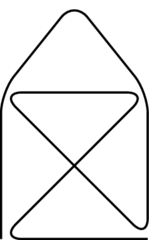

In [4]:
%%tikz --save rounded_path.png
\draw[thick,rounded corners=8pt]
(0,0) -- (0,2) -- (1,3.25) -- (2,2) -- (2,0) -- (0,2) -- (2,2) -- (0,0) -- (2,0);

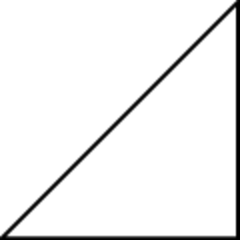

In [5]:
%%tikz 
\draw (0,0) -- (1,0) -- (1,1) -- cycle;

### Straight path construction

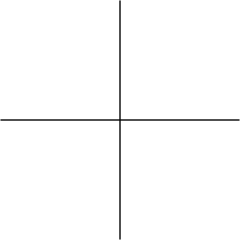

In [6]:
%%tikz 
\draw (-1.5, 0) -- (1.5, 0);
\draw (0, -1.5) -- (0, 1.5);

### Curved Path Construction
The next thing is to draw the circle. For this, straight lines obviously will not do. Instead,
we need some way to draw curves. For this, TikZ provides a special syntax. One or two “control points”
are needed. The math behind them is not quite trivial, but here is the basic idea: Suppose you are at point
x and the first control point is y. Then the curve will start “going in the direction of y at x,” that is, the
tangent of the curve at x will point toward y. Next, suppose the curve should end at z and the second
support point is w. Then the curve will, indeed, end at z and the tangent of the curve at point z will go
through w.
Here is an example (the control points have been added for clarity):

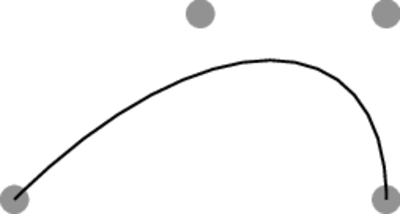

In [7]:
%%tikz 

\filldraw [gray] (0, 0) circle (2pt) 
             (1, 1) circle (2pt)
             (2, 1) circle (2pt)
             (2, 0) circle (2pt);
\draw (0, 0) .. controls (1, 1) and (2, 1) .. (2, 0);

The general syntax for extending a path in a “curved” way is 

       (start point) .. controls (first control point) and (second control point) .. (end point);
   
You can leave out the "and (second control point)", which causes the first one to be used twice.

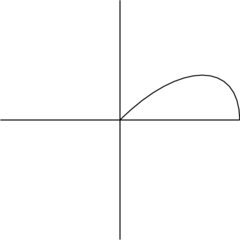

In [8]:
%%tikz 
\draw (-2, 0) -- (2, 0);
\draw (0, -2) -- (0, 2);

\draw (0, 0) .. controls (1, 1) and (2, 1) .. (2, 0);

###  Circle Path Construction


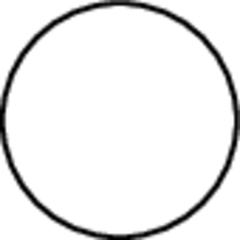

In [9]:
%tikz \draw (0,0) circle (10pt);

You can also append an ellipse to the path using the ellipse operation. Instead of a single radius you
can specify two of them, one for the x-direction and one for the y-direction, separated by **and**:

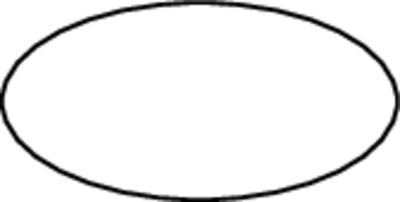

In [10]:
%%tikz -l positioning
\draw (0, 0) ellipse (20pt and 10pt);

Google tells me a package positioning.sty is missing. I need to install this package under mac to solve the problem shown in the previous cell.

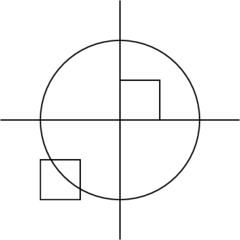

In [11]:
%%tikz
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\draw (0,0) rectangle (0.5,0.5);
\draw (-0.5,-0.5) rectangle (-1,-1);

### Grid Path Construction

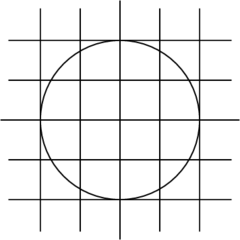

In [12]:
%%tikz
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\draw[step=.5cm] (-1.4,-1.4) grid (1.4,1.4);

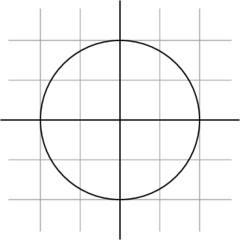

In [13]:
%%tikz
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);

### Arc Path Construction

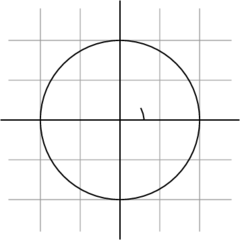

In [14]:
%%tikz
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\draw (3mm,0mm) arc (0:30:3mm);

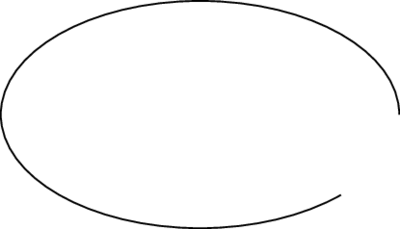

In [15]:
%%tikz -l positioning
\draw (0,0) arc (0:315:1.75cm and 1cm);

One can focus on a small region in the plots by **clip**.

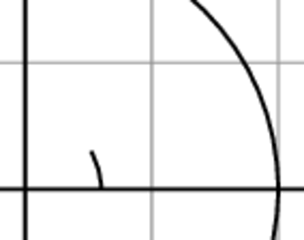

In [16]:
%%tikz
\clip (-0.1,-0.2) rectangle (1.1,0.75);
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\draw (3mm,0mm) arc (0:30:3mm);

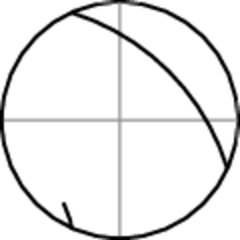

In [17]:
%%tikz
\clip[draw] (0.5, 0.5) circle (0.5);
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\draw (3mm,0mm) arc (0:30:3mm);

### Parabola and Sine Path Construction

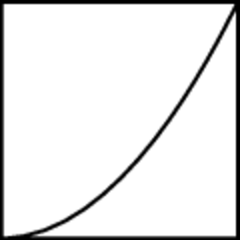

In [18]:
%tikz \draw (0, 0) rectangle (1, 1) (0, 0) parabola (1, 1);

#### Put bend somewhere else

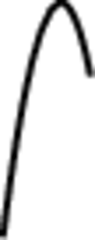

In [19]:
%tikz \draw[x=1pt,y=1pt] (0,0) parabola bend (4,16) (6,11);

The operations **sin** and **cos** add a sine or cosine curve in the interval [0, π/2] such that the previous
current point is at the start of the curve and the curve ends at the given end point. Here are two examples:

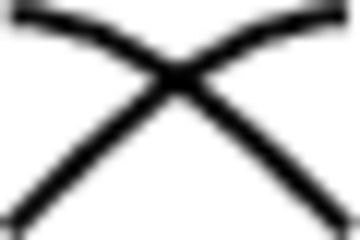

In [20]:
%%tikz
\draw[x=1.57ex,y=1ex] (0,0) sin (1,1);
\draw[x=1.57ex,y=1ex] (0,1) cos (1,0);

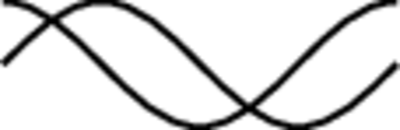

In [21]:
%%tikz
\draw[x=1.57ex,y=1ex] (0,0) sin (1,1) cos (2,0) sin (3,-1) cos (4,0)
(0,1) cos (1,0) sin (2,-1) cos (3,0) sin (4,1);

###  Filling and Drawing

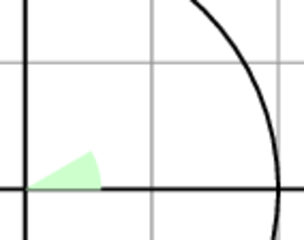

In [22]:
%%tikz
\clip (-0.1,-0.2) rectangle (1.1,0.75);
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\fill[green!20!white] (0,0) -- (3mm,0mm) arc (0:30:3mm) -- (0,0);

where the color **green!20!white** means 20% green and 80% white mixed together.

Different from **\fill**, the **\filldraw** will first draw the path, then fill it.

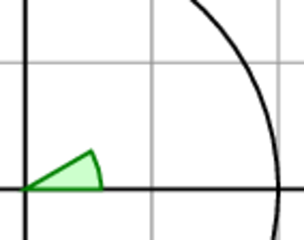

In [23]:
%%tikz
\clip (-0.1,-0.2) rectangle (1.1,0.75);
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\filldraw[fill=green!20!white, draw=green!50!black]
(0,0) -- (3mm,0mm) arc (0:30:3mm) -- cycle;

### Shading 

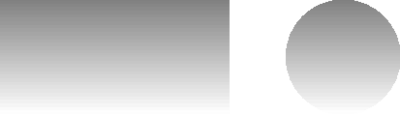

In [24]:
%%tikz
\shade (0, 0) rectangle (2, 1) (3, 0.5) circle (0.5);

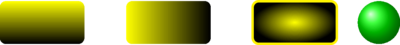

In [25]:
%%tikz -po "rounded corners, ultra thick"
\shade[top color=yellow,bottom color=black] (0,0) rectangle +(2,1);
\shade[left color=yellow,right color=black] (3,0) rectangle +(2,1);
\shadedraw[inner color=yellow,outer color=black,draw=yellow] (6,0) rectangle +(2,1);
\shade[ball color=green] (9,.5) circle (.5cm);

Notice that there is a **bug** in the tikzmagic.py which makes **-po** does not work with either
       
       -po rounded corners, ultra thick
       or
       -po "rounded corners, ultra thick"
       
In order to fix this bug under Mac, using **command + space** to open search window, look for "tikzmagic.py", replace the following line in tikzmagic.py,
```python
picture_options = args.pictureoptions
```
with 
```python
picture_options = args.pictureoptions.strip('"')
```

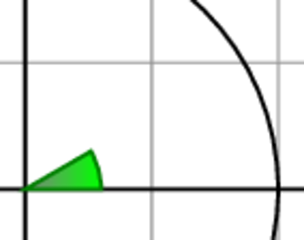

In [26]:
%%tikz
\clip (-0.1,-0.2) rectangle (1.1,0.75);
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\shadedraw[left color=gray,right color=green, draw=green!50!black]
(0,0) -- (3mm,0mm) arc (0:30:3mm) -- cycle;

You can add a single + sign in front of a coordinate or two of them as in +(1cm,0cm) or ++(0cm,2cm).
Such coordinates are interpreted differently: The first form means “1cm upwards from the previous specified
position” and the second means “2cm to the right of the previous specified position, making this the new
specified position.” For example, we can draw the sine line as follows:

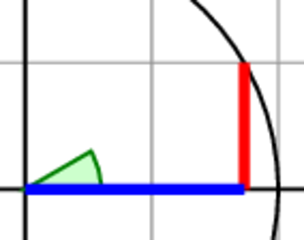

In [27]:
%%tikz 
\clip (-0.1,-0.2) rectangle (1.1,0.75);
\draw[step=.5cm,gray,very thin] (-1.4,-1.4) grid (1.4,1.4);
\draw (-1.5,0) -- (1.5,0);
\draw (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\filldraw[fill=green!20,draw=green!50!black] (0,0) -- (3mm,0mm) arc
(0:30:3mm) -- cycle;
\draw[red,very thick] (30:1cm) -- +(0,-0.5);
\draw[blue,very thick] (30:1cm) ++(0,-0.5) -- (0,0);

### Difference between + and ++

Notice that the coordinates in **\def\rectanglepath{...}** are different for 2 cases.

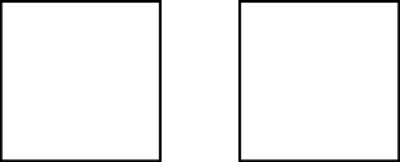

In [28]:
%%tikz
\def\rectanglepath{-- ++(1cm,0cm) -- ++(0cm,1cm) -- ++(-1cm,0cm) -- cycle}
\draw (0,0) \rectanglepath;
\draw (1.5,0) \rectanglepath;

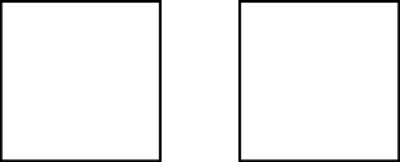

In [29]:
%%tikz
\def\rectanglepath{-- +(1cm,0cm) -- +(1cm,1cm) -- +(0cm,1cm) -- cycle}
\draw (0,0) \rectanglepath;
\draw (1.5,0) \rectanglepath;

### Repeat things

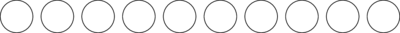

In [30]:
%%tikz
\foreach \x in {1,...,10}
\draw (\x,0) circle (0.4cm);

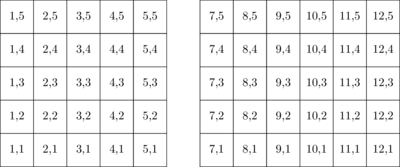

In [31]:
%%tikz

\foreach \x in {1,2,...,5,7,8,...,12}
\foreach \y in {1,...,5}
{
\draw (\x,\y) +(-.5,-.5) rectangle ++(.5,.5);
\draw (\x,\y) node{\x,\y};
}

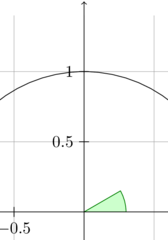

In [32]:
%%tikz --scale 3
\clip (-0.6,-0.2) rectangle (0.6,1.51);
\draw[step=.5cm,help lines] (-1.4,-1.4) grid (1.4,1.4);
\filldraw[fill=green!20,draw=green!50!black]
(0,0) -- (3mm,0mm) arc (0:30:3mm) -- cycle;
\draw[->] (-1.5,0) -- (1.5,0); \draw[->] (0,-1.5) -- (0,1.5);
\draw (0,0) circle (1cm);
\foreach \x in {-1,-0.5,1}
\draw (\x cm,1pt) -- (\x cm,-1pt) node[anchor=north] {$\x$};
\foreach \y in {-1,-0.5,0.5,1}
\draw (1pt,\y cm) -- (-1pt,\y cm) node[anchor=east] {$\y$};

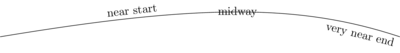

In [33]:
%%tikz 
\draw (0,0) .. controls (6,1) and (9,1) ..
node[near start,sloped,above] {near start}
node {midway}
node[very near end,sloped,below] {very near end} (12,0);

### Nodes

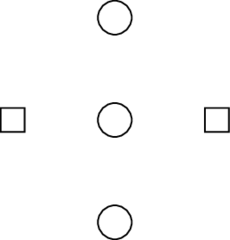

In [34]:
%%tikz
\node at ( 0,2) [circle,draw] {};
\node at ( 0,1) [circle,draw] {};
\node at ( 0,0) [circle,draw] {};
\node at ( 1,1) [rectangle,draw] {};
\node at (-1,1) [rectangle,draw] {};

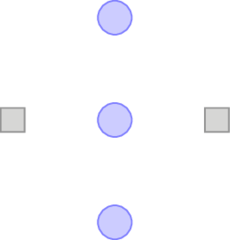

In [35]:
%%tikz
\node at ( 0,2) [circle,draw=blue!50,fill=blue!20] {};
\node at ( 0,1) [circle,draw=blue!50,fill=blue!20] {};
\node at ( 0,0) [circle,draw=blue!50,fill=blue!20] {};
\node at ( 1,1) [rectangle,draw=black!50,fill=black!20] {};
\node at (-1,1) [rectangle,draw=black!50,fill=black!20] {};

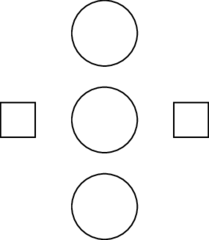

In [36]:
%%tikz -l arrows,decorations.pathmorphing,backgrounds,positioning,fit,petri,mindmap,snakes
[place/.style={circle,draw=blue!50,fill=blue!20,thick},
transition/.style={rectangle,draw=black!50,fill=black!20,thick}]
\node at ( 0,2) [place] {};
\node at ( 0,1) [place] {};
\node at ( 0,0) [place] {};
\node at ( 1,1) [transition] {};
\node at (-1,1) [transition] {};

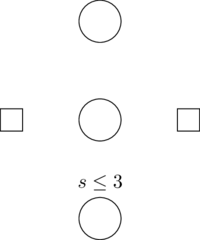

In [37]:
%%tikz -l arrows,decorations.pathmorphing,backgrounds,positioning,fit,petri,mindmap,snakes
\node[place] (waiting) {};
\node[place] (critical) [below=of waiting] {};
\node[place] (semaphore) [below=of critical,
label=above:$s\le3$] {};
\node[transition] (leave critical) [right=of critical] {};
\node[transition] (enter critical) [left=of critical] {};

### Curl lines

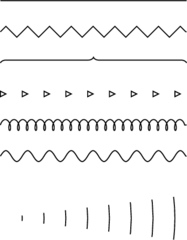

In [38]:
%%tikz -l snakes
\draw (0,3.5)   -- (3,3.5);
\draw[snake=zigzag] (0,3)   -- (3,3);
\draw[snake=brace] (0,2.5) -- (3,2.5);
\draw[snake=triangles] (0,2)   -- (3,2);
\draw[snake=coil,segment length=4pt] (0,1.5) -- (3,1.5);
\draw[snake=coil,segment aspect=0] (0,1)   -- (3,1);
\draw[snake=expanding waves,segment angle=7] (0,0)   -- (3,0);

## My own examples 

### Proton structure

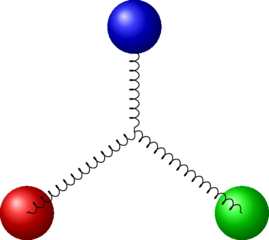

In [39]:
%%tikz -l snakes
\shade[ball color=red] (-2, 0) circle (.5cm);
\shade[ball color=green] (2, 0) circle (.5cm);
\shade[ball color=blue] (0, 3.464) circle (.5cm);
\draw[snake=coil,segment length=5pt] (0, 3) -- (0, 1.5);
\draw[snake=coil,segment length=5pt] (0, 1.5) -- (-2, 0);
\draw[snake=coil,segment length=5pt] (0, 1.5) -- (2, 0);

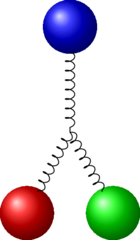

In [40]:
%%tikz -l snakes
\shade[ball color=red] (-0.8, 0) circle (.5cm);
\shade[ball color=green] (0.8, 0) circle (.5cm);
\shade[ball color=blue] (0, 3.464) circle (.5cm);
\draw[snake=coil,segment length=5pt] (0, 3) -- (0, 1.5);
\draw[snake=coil,segment length=5pt] (0, 1.5) -- (-0.6, 0.4);
\draw[snake=coil,segment length=5pt] (0, 1.5) -- (0.6, 0.4);

### Covolution neural network

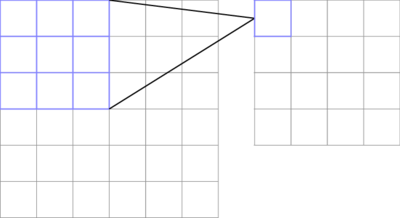

In [41]:
%%tikz
\tikzset{cnn kernel lines/.style=blue!50, very thin};
\draw[step=.5cm,gray,very thin] (-1.5,-1.5) grid (1.5,1.5);
\draw[step=.5cm,cnn kernel lines] (-1.5, 0) grid (0,1.5);

\draw[step=.5cm,gray,very thin] (1.99, 1.5) grid (4, -0.5);
\draw (0, 1.5) -- (2, 1.25);
\draw (0, 0) -- (2, 1.25);
\draw[step=.5cm,cnn kernel lines] (1.99, 0.99) grid (2.5, 1.5);